In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    N = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    D = sum([xi**2 for xi in X]) - n * xbar**2

    b = N / D
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.2f} + {:.6f}x'.format(a, b))
    return a, b

In [4]:
X_vals = pd.read_csv('X_values.csv')
Y_vals = pd.read_csv('Y_values.csv')
Data = pd.read_csv('Data points.csv')

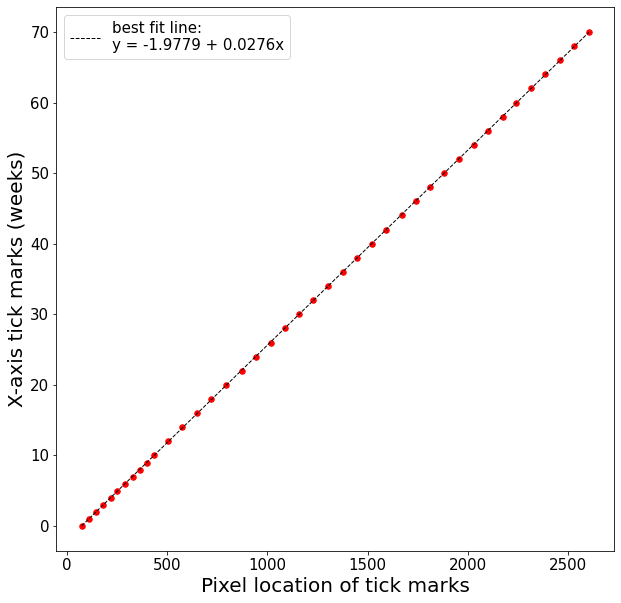

In [7]:
a, b = best_fit(X_vals['Pixel_X'], X_vals['Actual_X'])
yfit = [a + b * xi for xi in X_vals['Pixel_X']]


plt.figure(figsize=(10,10))
plt.plot(X_vals['Pixel_X'], yfit, 'k--', linewidth=1, label="best fit line:\ny = {:.4f} + {:.4f}x".format(a, b))
plt.scatter(X_vals['Pixel_X'], X_vals['Actual_X'], s = 30, color = 'red')
plt.legend(fontsize=15)
plt.ylabel('X-axis tick marks (weeks)', fontsize=20)
plt.xlabel('Pixel location of tick marks', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('Calibration curve X', bbox_inches='tight')
plt.show()

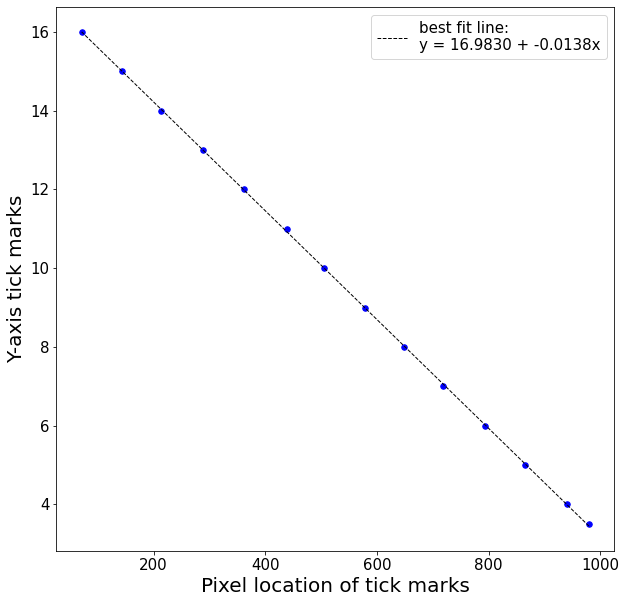

In [6]:
a, b = best_fit(Y_vals['Pixel_Y'], Y_vals['Actual_Y'])
yfit = [a + b * xi for xi in Y_vals['Pixel_Y']]


plt.figure(figsize=(10,10))
plt.plot(Y_vals['Pixel_Y'], yfit, 'k--', linewidth=1, label="best fit line:\ny = {:.4f} + {:.4f}x".format(a, b))
plt.scatter(Y_vals['Pixel_Y'], Y_vals['Actual_Y'], s = 30, color = 'blue')
plt.legend(fontsize=15)
plt.ylabel('Y-axis tick marks', fontsize=20)
plt.xlabel('Pixel location of tick marks', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('Calibration curve Y', bbox_inches='tight')
plt.show()

In [8]:
Data['Actual value X'] = -1.9779 + (0.0276*Data['Pixel Graph X'])
Data['Actual value Y'] = 16.9830 - (0.0138*Data['Pixel Graph Y'])
Data.to_csv('Final data.csv',index = None, header=True)

In [9]:
Data.head()

,Pixel Graph X,Pixel Graph Y,Actual value X,Actual value Y
0,73,960,0.0369,3.7350
1,107,936,0.9753,4.0662
2,144,958,1.9965,3.7626
3,177,937,2.9073,4.0524
4,218,887,4.0389,4.7424


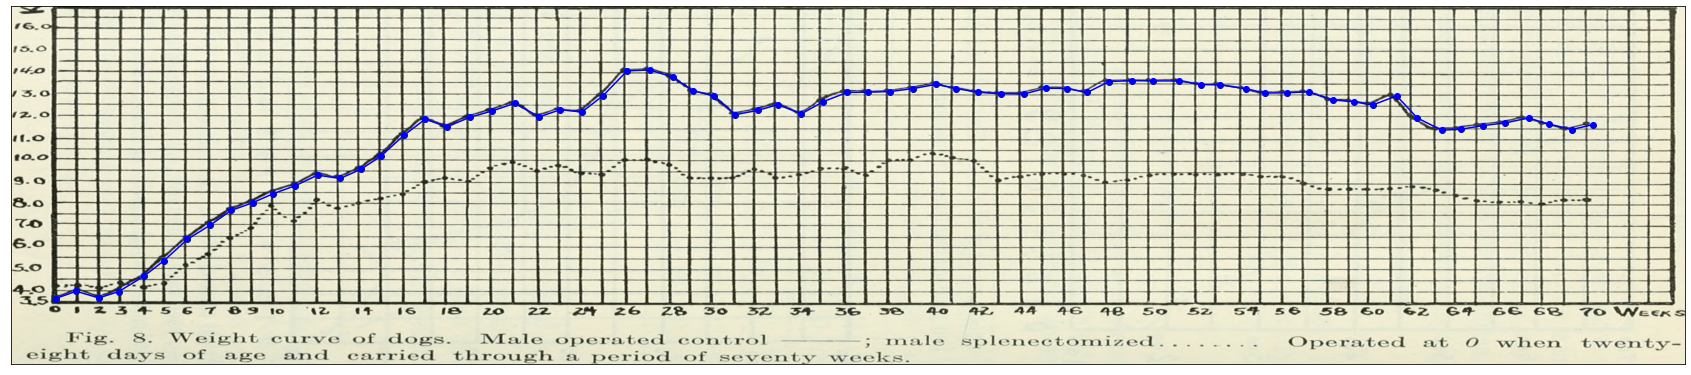

In [15]:
img = plt.imread('Activity 2 Hand Drawn Plot.jpg')

plt.figure(figsize= (20*1.5,15*1.5))
plt.plot(Data['Actual value X'], Data['Actual value Y'], 'bo-', zorder = 1)
plt.imshow(img, zorder = 0, extent=[-2, 74, 0.75, 17]) #adjust the extent to account for the white space in the image
plt.xticks([]), plt.yticks([])
plt.savefig('Overlay', bbox_inches='tight')
plt.show()

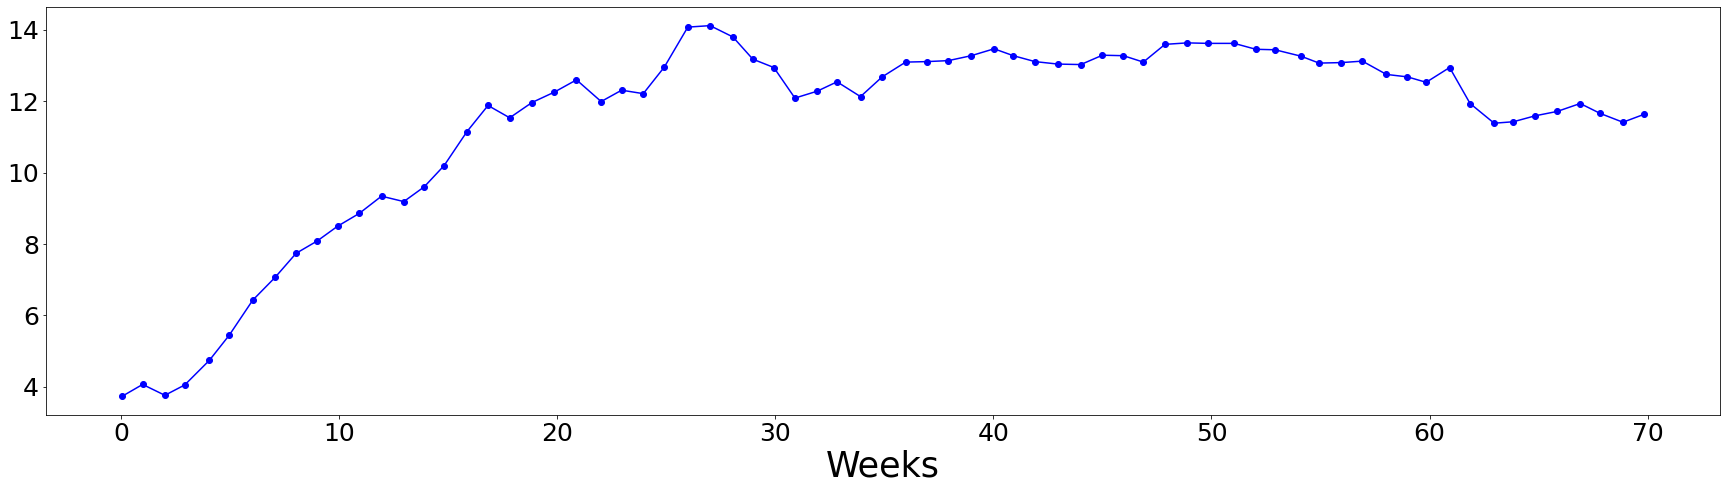

In [16]:
img = plt.imread('Activity 2 Hand Drawn Plot.jpg')

plt.figure(figsize= (20*1.5,5*1.5))
plt.plot(Data['Actual value X'], Data['Actual value Y'], 'bo-', zorder = 1)
#plt.imshow(img, zorder = 0, extent=[-2, 74, 0.75, 17]) #adjust the extent to account for the white space in the image
#plt.savefig('Overlay', bbox_inches='tight')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Weeks', fontsize=35)
plt.savefig('plot', bbox_inches='tight')
plt.show()